In [5]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%ls

all_data.csv  data_analysis.ipynb


In [3]:
df = pd.read_csv("all_data.csv")
df = df.drop("Unnamed: 4", axis=1)
df.head()

,document,date,label_1,label_2
0,OCASIÓN vendo casa zona Tagarete. Ref.: 72473923,2017-07-21,Casas,Venta
1,"VENDO casa (4 pisos) con tiendas, Avenida 6 de...",2017-07-21,Casas,Venta
2,CASA en venta. Tarapacá No. 2045 Celular 69577670,2017-07-21,Casas,Venta
3,"CASA en venta, departamentos completos, Santa ...",2017-07-21,Casas,Venta
4,CASA en venta zona Mercado Young 300 m2. Ref.:...,2017-07-21,Casas,Venta


In [3]:
df.describe()

,document,date,label_1,label_2
count,111454,111454,111454,111454
unique,25164,4,55,241
top,EMPLEOS,2017-07-21,Casas,Venta
freq,626,111445,23843,48172


In [17]:
#df['numbers'] = df['document'].apply(lambda x: re.sub("[0-9]+", '', x))
def find_telefon_numbers(x):
    numbers = []
    result = re.findall("[0-9]+", x)
    for n in result:
        if (len(n)> 7):
            numbers.append(n)
    return numbers
        

df['numbers'] = df['document'].apply(lambda x: find_telefon_numbers(x) )
#lambda x: True if x % 2 == 0 else False

df.head()

,document,date,label_1,label_2,numbers
0,OCASIÓN vendo casa zona Tagarete. Ref.: 72473923,2017-07-21,Casas,Venta,[72473923]
1,"VENDO casa (4 pisos) con tiendas, Avenida 6 de...",2017-07-21,Casas,Venta,"[72308676, 73803343]"
2,CASA en venta. Tarapacá No. 2045 Celular 69577670,2017-07-21,Casas,Venta,[69577670]
3,"CASA en venta, departamentos completos, Santa ...",2017-07-21,Casas,Venta,[72308001]
4,CASA en venta zona Mercado Young 300 m2. Ref.:...,2017-07-21,Casas,Venta,"[72488590, 67212183]"


In [32]:
import itertools

numbers = df["numbers"].tolist()
numbers = list(itertools.chain.from_iterable(numbers))

print(len(list(numbers)))
print(numbers[:5])
print(len(set(numbers)))

122662
['72473923', '72308676', '73803343', '69577670', '72308001']
8028


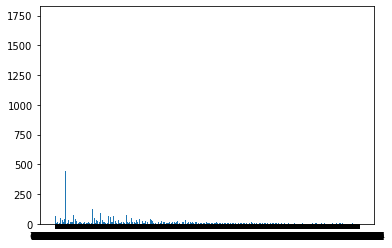

In [33]:
from collections import Counter
import numpy as np

# Read CSV file, get author names and counts.
counter = Counter(numbers)
author_names = counter.keys()
author_counts = counter.values()

# Plot histogram using matplotlib bar().
indexes = np.arange(len(author_names))
width = 0.7
plt.bar(indexes, author_counts, width)
plt.xticks(indexes + width * 0.5, author_names)
plt.show()

In [8]:
t = df["document"][4]
print(t)
pattern_name = re.compile("[0-9]+")
#pattern_two = re.compile("[A-Z]+\n+[a-z]")
result = pattern_name.findall(t)

print(result)


CASA en venta zona Mercado Young 300 m2. Ref.: 72488590, 67212183
['300', '2', '72488590', '67212183']
